## Homework 3

**Submitted by : Tanvi Arora**  
**Section : DS 7337 Natural Language Processing - 401**

<a id="top"></a>
### Contents

* <a href="#editdistance">1-a. Edit distance between given name and nick name</a>
* <a href="#percentstringmatch">1-b. Percentage String Match between given name and nick name </a>
* <a href="#removestopwords">2. Rewrite excluding stopwords</a>
* <a href="#stemmers">3-a. Run through the stemmer</a>
* <a href="#morphologicalroots">3-b. Compare stems with morphological roots</a>

In [116]:
import platform
print(platform.platform())

import sys
print("Python",sys.version)

import nltk
from nltk.tokenize import regexp_tokenize
print("nltk",nltk.__version__)

## for percentage string match
from difflib import SequenceMatcher

## for random book picking
import random

## for Regex Tokenizer
import re

## for Stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

## for Lemmatization
from nltk.stem import WordNetLemmatizer

## for visualizations
import matplotlib.pyplot as plt
import pandas as pd

Darwin-18.5.0-x86_64-i386-64bit
Python 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
nltk 3.4


<a id="editdistance"></a>
<a href="#top">Back to Top</a>
### Edit Distance between given name and nick name

In [13]:
def get_editdistance(str1,str2):
    return nltk.edit_distance(str1,str2,1,False)

def print_editdistance(text1,text2):
    print("Edit distance between ",text1," and ",text2," is ",get_editdistance(text1,text2))
    print("Edit distance between ",text1," and ",text2," is ",get_editdistance(text2,text1))

In [51]:
given_name='Tanvi'
nick_name=['Tanu','Frazi','Mitthi','Bhanu','uvxyz']

In [52]:
ed=[get_editdistance(given_name,nn) for nn in nick_name]

for nn in nick_name:
    print_editdistance(given_name,nn)
    print()



Edit distance between  Tanvi  and  Tanu  is  2
Edit distance between  Tanvi  and  Tanu  is  2

Edit distance between  Tanvi  and  Frazi  is  4
Edit distance between  Tanvi  and  Frazi  is  4

Edit distance between  Tanvi  and  Mitthi  is  5
Edit distance between  Tanvi  and  Mitthi  is  5

Edit distance between  Tanvi  and  Bhanu  is  4
Edit distance between  Tanvi  and  Bhanu  is  4

Edit distance between  Tanvi  and  uvxyz  is  5
Edit distance between  Tanvi  and  uvxyz  is  5



  nick_name  edit_distance
0      Tanu              2
1     Frazi              4
2    Mitthi              5
3     Bhanu              4
4     uvxyz              5


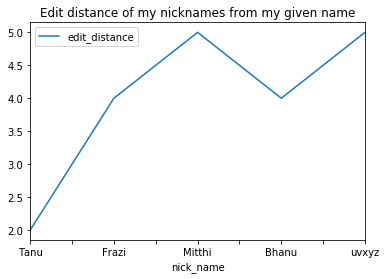

In [54]:
edit_dist_df=pd.DataFrame({'nick_name' : nick_name,
                           'edit_distance' : ed})

print(edit_dist_df)

edit_dist_df.plot(kind='line', x='nick_name' , y='edit_distance',title='Edit distance of my nicknames from my given name')

So my nick name which is closest to my actual name has an edit distance of 2. Secret : That is the name mostly strangers come up with and none of my family members or close friends. Nick names for people close to us are like secret names, far from your given names. 
Tried different names and edit distance for same length names is same. Is that a coincidence or a fact ? Does edit distance have anything to do with the length of the nick name or just the characters ? And so added a dummy name of 5 letters , none of which match to any letters in my name. And edit distance was different than other names with same length.So, looks like length of name and number of different letters in the name both contribute to the edit distance

<a id="percentstringmatch"></a>
<a href="#top">Back to Top</a>
### Percentage String match between given name and nick name

In [101]:
def get_stringmatch(str1,str2):
    return "{0:.0f}".format(SequenceMatcher(None,str1,str2).ratio() *100)
    
    
def print_stringmatch(str1,str2):
    m=get_stringmatch(str1,str2)
    print("Percentage string match between ",str1," and ",str2," is ",m)

In [102]:
sm=[get_stringmatch(given_name,nn) for nn in nick_name]

for nn in nick_name:
    print_stringmatch(given_name,nn)
    print()

Percentage string match between  Tanvi  and  Tanu  is  67

Percentage string match between  Tanvi  and  Frazi  is  40

Percentage string match between  Tanvi  and  Mitthi  is  18

Percentage string match between  Tanvi  and  Bhanu  is  40

Percentage string match between  Tanvi  and  uvxyz  is  20



  nick_name  stringmatch_%
0      Tanu             67
1     Frazi             40
2    Mitthi             18
3     Bhanu             40
4     uvxyz             20


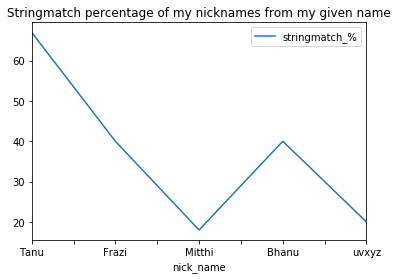

In [103]:
stringmatch_df=pd.DataFrame({'nick_name' : nick_name,
                           'stringmatch_%' : sm})
stringmatch_df["stringmatch_%"]=stringmatch_df.apply(lambda row : int(row["stringmatch_%"]), axis=1)

print(stringmatch_df)
stringmatch_df.plot(kind='line', x='nick_name' , y='stringmatch_%',title='Stringmatch percentage of my nicknames from my given name')

Stringmatch percentage between my nicknames and given name, well looks to be inversely proportional to the edit distance.The lower the edit distance, higher is the percentage string match when compared to higher edit distance. 
Even the nickname with no possible character match with my given name has a string match of 20%

<a id="removestopwords"></a>
<a href="#top">Back to Top</a>
### Remove stop words

In [118]:
Becoming_MichelleObama="I spent much of my childhood listening to the sound of striving. It came in the form of basd music, or at least amateur music, coming up through the floorboards of my bedroom - the plink plink plink of students sitting downstairs at my great-aunt Robbie's piano, slowly and imperfectly learning their scales."
JustMercy_BryanStevenson="The temporary receptionist was an elegant African American woman wearing a dark,expensive business suit - a well-dressed exception to the usual crowd at the Southern Prisoners Defense Committee(SDPC) in Atlanta, where I had returned after graduation to work full time. On her first day, I'd rambled over to her in my regular uniform if jeans and sneakers and offered to answer any questions she might have to help her get acclimated."
Educated_TaraWestover="My strongest memory is not a memory.It's something I imagined, then came to remember as if it had happened."
book_index=random.randint(0,2)
book_list=[Becoming_MichelleObama,JustMercy_BryanStevenson,Educated_TaraWestover]
book_text=book_list[book_index]
print(book_text)


The temporary receptionist was an elegant African American woman wearing a dark,expensive business suit - a well-dressed exception to the usual crowd at the Southern Prisoners Defense Committee(SDPC) in Atlanta, where I had returned after graduation to work full time. On her first day, I'd rambled over to her in my regular uniform if jeans and sneakers and offered to answer any questions she might have to help her get acclimated.


In [130]:
def get_wordtokens(text):
    # word tokenization
    default_wt = nltk.word_tokenize
    words=default_wt(text)
    only_words=[w for w in words if w.isalpha()]
    return only_words

def remove_stopwords(tokens):
    stopword_list=nltk.corpus.stopwords.words('english')
    filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
    return filtered_tokens

In [131]:
words_nostpwrds=remove_stopwords(get_wordtokens(book_text))
print(words_nostpwrds)

['temporary', 'receptionist', 'elegant', 'African', 'American', 'woman', 'wearing', 'dark', 'expensive', 'business', 'suit', 'exception', 'usual', 'crowd', 'Southern', 'Prisoners', 'Defense', 'Committee', 'SDPC', 'Atlanta', 'returned', 'graduation', 'work', 'full', 'time', 'first', 'day', 'rambled', 'regular', 'uniform', 'jeans', 'sneakers', 'offered', 'answer', 'questions', 'might', 'help', 'get', 'acclimated']


<a id="stemmers"></a>
<a href="#top">Back to Top</a>
### Run through stemmers

In [135]:
def apply_porterstemmer(words):
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in words]
    return stemmed_words

def apply_lancasterstemmer(words):
    ls=LancasterStemmer()
    stemmed_words=[ls.stem(w) for w in words]
    return stemmed_words

In [136]:
print("Applying PorterStemmer to word list cleaned off stopwords")
ps_stemmed_words=apply_porterstemmer(words_nostpwrds)
print(ps_stemmed_words)
print()
print("Applying LancasterStemmer to word list cleaned off stopwords")
ls_stemmed_words=apply_lancasterstemmer(words_nostpwrds)
print(ls_stemmed_words)

Applying PorterStemmer to word list cleaned off stopwords
['temporari', 'receptionist', 'eleg', 'african', 'american', 'woman', 'wear', 'dark', 'expens', 'busi', 'suit', 'except', 'usual', 'crowd', 'southern', 'prison', 'defens', 'committe', 'sdpc', 'atlanta', 'return', 'graduat', 'work', 'full', 'time', 'first', 'day', 'rambl', 'regular', 'uniform', 'jean', 'sneaker', 'offer', 'answer', 'question', 'might', 'help', 'get', 'acclim']

Applying LancasterStemmer to word list cleaned off stopwords
['temp', 'receiv', 'eleg', 'afr', 'am', 'wom', 'wear', 'dark', 'expend', 'busy', 'suit', 'exceiv', 'us', 'crowd', 'southern', 'prison', 'defens', 'commit', 'sdpc', 'atlant', 'return', 'gradu', 'work', 'ful', 'tim', 'first', 'day', 'rambl', 'regul', 'uniform', 'jean', 'sneak', 'off', 'answ', 'quest', 'might', 'help', 'get', 'acclim']


Although the list of stems from both the stemmers are almost same , the stem words itself for each of the referred words in original text are different. By the view of it, LancasterStemmer seems to have returned lot of stems that don't seem to be a lexicographically correct word.

<a id="morphologicalroots"></a>
<a href="#top">Back to Top</a>
### Lemmatization

In [123]:
def find_lemmas(words):
    lemmas=[]
    wnl=WordNetLemmatizer()
    lemmas_n=[wnl.lemmatize(w.lower(),'n') for w in words if wnl.lemmatize(w.lower(),'n')!= w.lower() ]
    lemmas_v=[wnl.lemmatize(w.lower(),'v') for w in words if wnl.lemmatize(w.lower(),'v')!= w.lower() ]
    lemmas_a=[wnl.lemmatize(w.lower(),'a') for w in words if wnl.lemmatize(w.lower(),'a')!= w.lower() ]
    lemmas.extend(lemmas_n)
    lemmas.extend(lemmas_v)
    lemmas.extend(lemmas_a)
    return lemmas

In [124]:
lemmas=find_lemmas(words_nostpwrds)
print(lemmas)

['prisoner', 'jean', 'sneaker', 'question', 'wear', 'return', 'ramble', 'offer', 'question', 'acclimate']


Above words are morphological roots, each of these words make sense and are correct words . The function we have used here finds the base form or lemma for a given word using the word and its part of speech by checking the Wordnet corpus . If no match is found, the input word itseld is returned unchanged, which we have ignored.

In [125]:
def find_morphologicalroots(lemmas,stemwords):
    return [sw for sw in stemwords if sw in lemmas]

In [126]:
print("morphological roots in ps stemmed words :- ")
if find_morphologicalroots(lemmas,ps_stemmed_words):
    print(find_morphologicalroots(lemmas,ps_stemmed_words))
else:
    print("No Morphological roots in ps stemmer")

print()
print("==============================")
print()

print("morphological roots in ls stemmed words:- ")
if find_morphologicalroots(lemmas,ls_stemmed_words):
    print(find_morphologicalroots(lemmas,ls_stemmed_words))
else:
    print("No Morphological roots in ls stemmer")

morphological roots in ps stemmed words :- 
['wear', 'return', 'jean', 'sneaker', 'offer', 'question']


morphological roots in ls stemmed words:- 
['wear', 'return', 'jean']


Porter Stemmer has returned more morphological roots than LancasterStemmer. From the looks of it Lancaster Stemmed words did have lot of irrelevant stems. 